# Data Vizualization
### In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

### Import required libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

### Read  the data

In [101]:
df = pd.read_csv("data/Bank_data.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### The distribution of the dependent variable in the dataset is plotted as columns graphs.

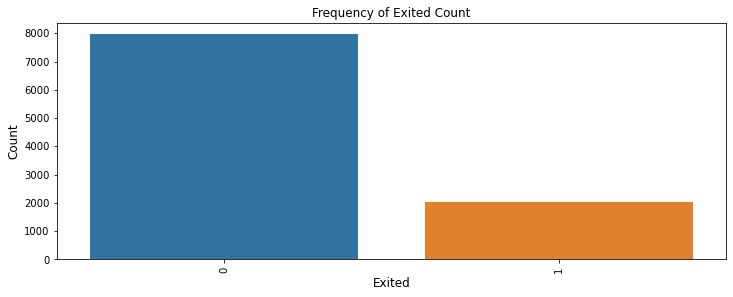

Exited Count [(0, 7963), (1, 2037)]


In [102]:
plt.figure(figsize=(12,20))
plt.subplot(413)
sns.countplot(x="Exited", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Exited', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Exited Count", fontsize=12)
plt.show()
exited_count = Counter(df['Exited']).most_common()
print("Exited Count " +str(exited_count))

### Plotted the categorical variables according to the dependent variable.

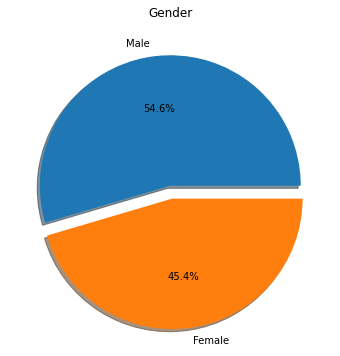

In [103]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Gender')
plt.ylabel('')

plt.show()

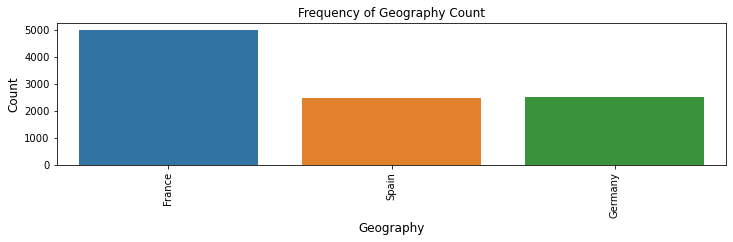

Geography Count [('France', 5014), ('Germany', 2509), ('Spain', 2477)]


In [104]:
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="Geography", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Geography', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Geography Count", fontsize=12)
plt.show()
geography_count = Counter(df['Geography']).most_common()
print("Geography Count " +str(geography_count))

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

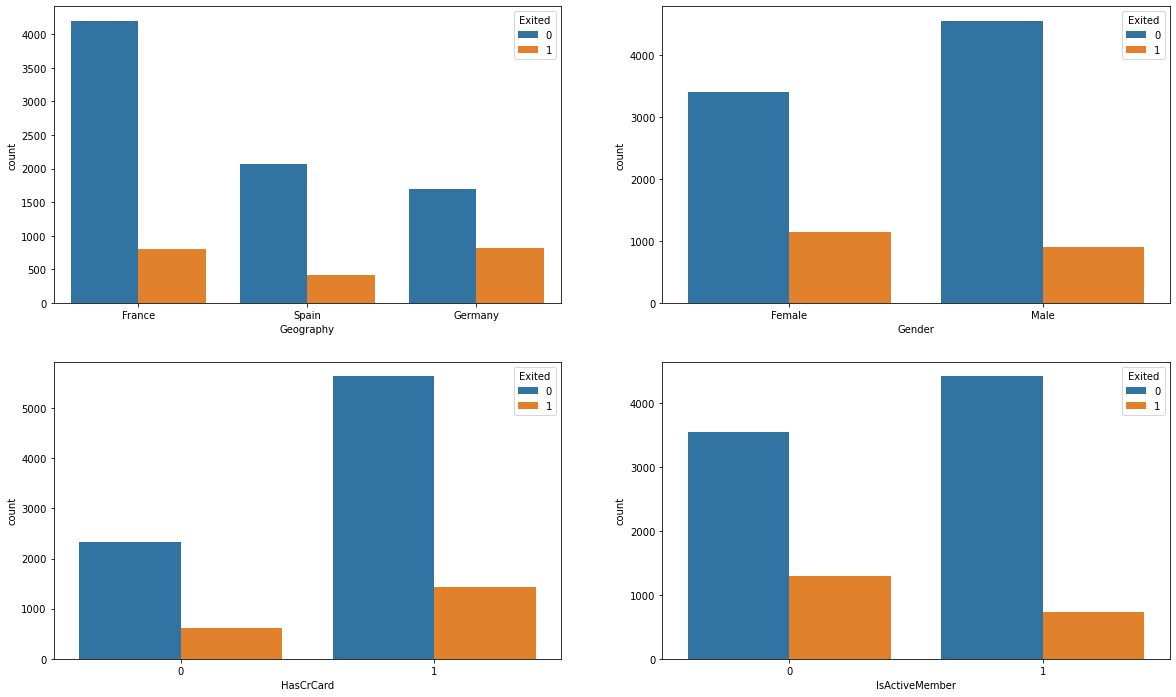

In [105]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Box Plots
#### For graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

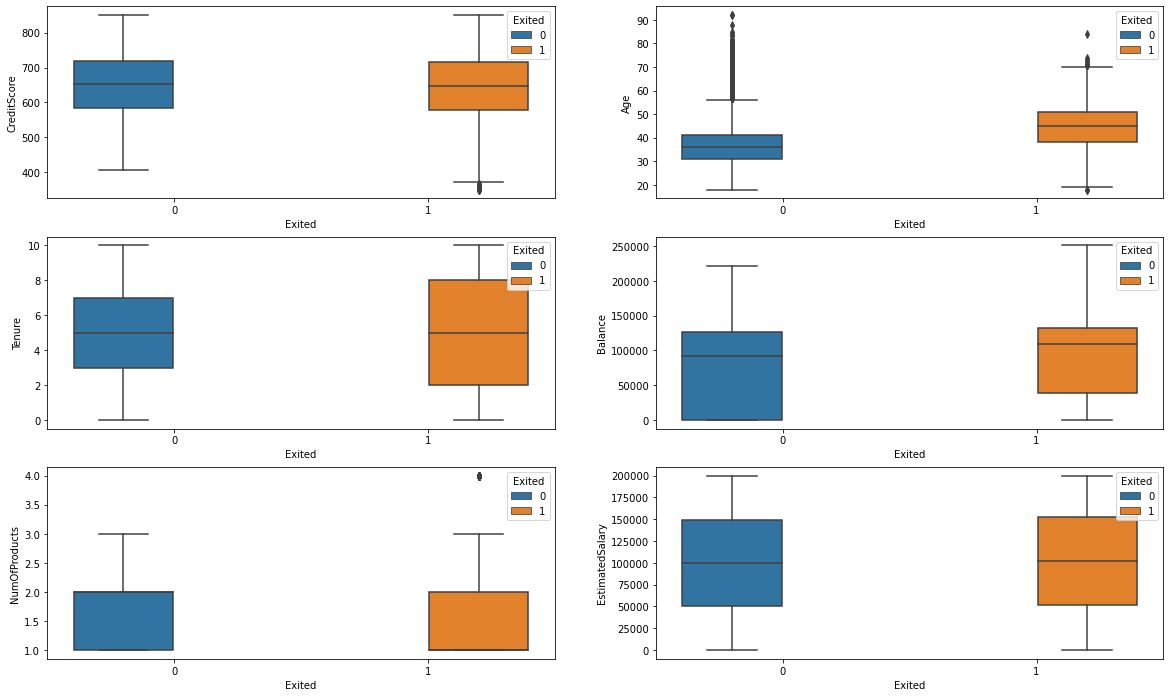

In [106]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Frequency Distribution
#### Is a representation in a graphical format, that displays the number of observations within a given interval

Mean of Estimated Salary = 100090.2398809998
Median of Estimated Salary = 100193.915


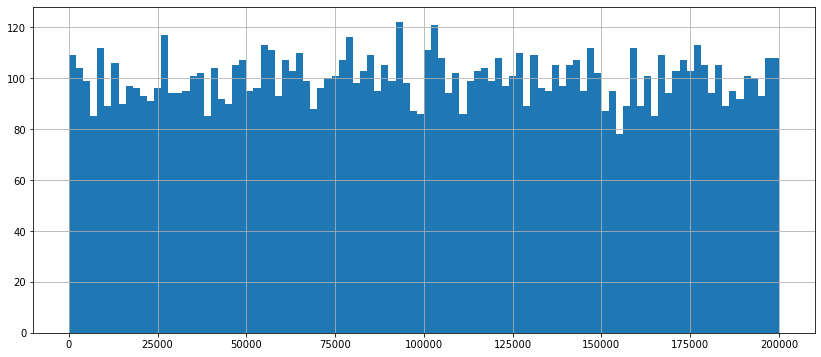

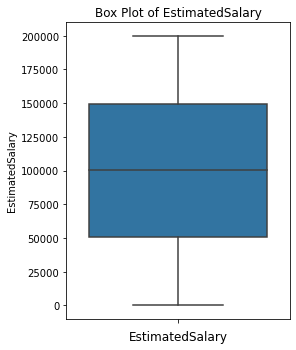

In [107]:
tmp_es = df[(df["EstimatedSalary"]>=0)]

print("Mean of Estimated Salary = " +str(np.mean(tmp_es['EstimatedSalary'])))
print("Median of Estimated Salary = " +str(np.median(tmp_es['EstimatedSalary'])))


tmp_es["EstimatedSalary"].hist(bins=100, figsize=[14,6])

plt.figure(figsize=(4,12))
plt.subplot(212)
sns.boxplot(y=tmp_es["EstimatedSalary"],data=tmp_es)
plt.xlabel('EstimatedSalary', fontsize=12)
plt.title("Box Plot of EstimatedSalary", fontsize=12)
plt.show()

Mean of Balance = 119827.49379288674
Median of Balance = 119839.69


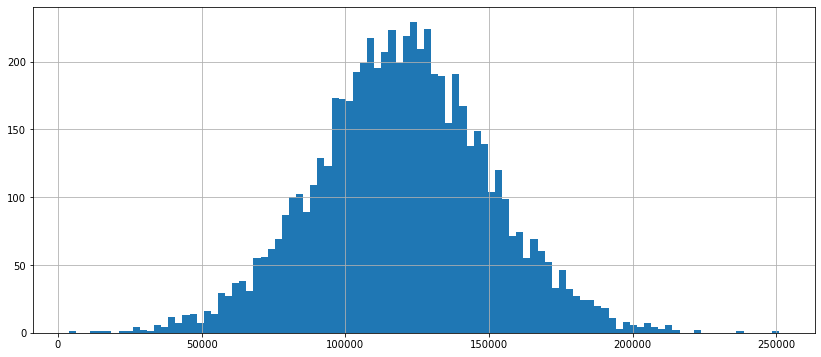

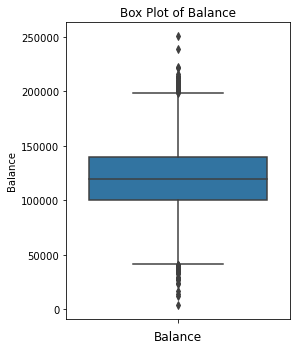

In [108]:
tmp_bl = df[(df["Balance"]>0)]

print("Mean of Balance = " +str(np.mean(tmp_bl['Balance'])))
print("Median of Balance = " +str(np.median(tmp_bl['Balance'])))


tmp_bl["Balance"].hist(bins=100, figsize=[14,6])

plt.figure(figsize=(4,12))
plt.subplot(212)
sns.boxplot(y=tmp_bl["Balance"],data=tmp_bl)
plt.xlabel('Balance', fontsize=12)
plt.title("Box Plot of Balance", fontsize=12)
plt.show()

In [109]:
import plotly.express as px
fig = px.bar(df,y = "Exited", x = "Age" , color = "Geography")
fig.show()

### Correlation Matrix

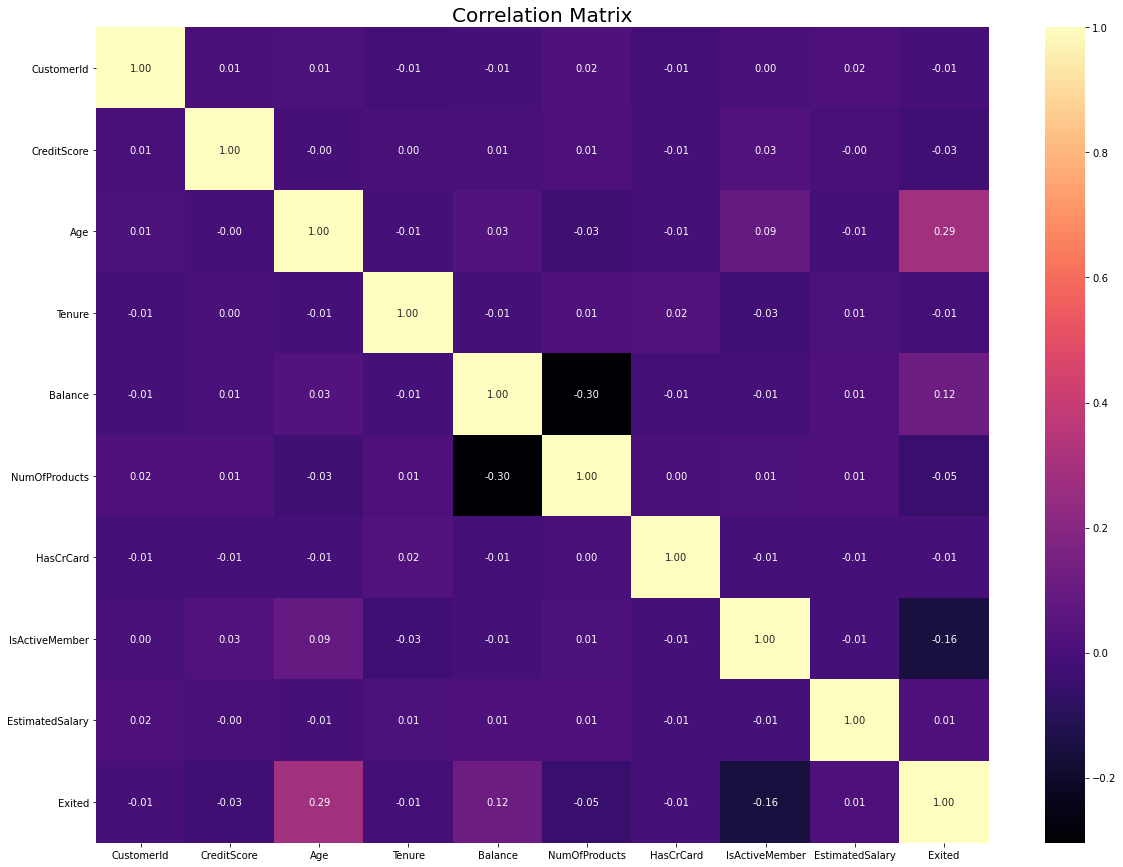

In [110]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()